In [3]:
import pandas as pd
import numpy as np

# pct_change()

In [13]:
s = pd.Series(np.random.randn(8))
s

0   -0.247070
1   -0.816502
2   -0.891049
3    0.123334
4   -1.894544
5    0.250354
6    1.201896
7   -1.719111
dtype: float64

In [14]:
s.pct_change()

0          NaN
1     2.304743
2     0.091301
3    -1.138414
4   -16.361082
5    -1.132145
6     3.800781
7    -2.430333
dtype: float64

# cov(), corr()

In [15]:
s1 = pd.Series(np.random.randn(1000))
s2 = pd.Series(np.random.randn(1000))
s1.cov(s2)

-0.025085131037641647

In [16]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=['a', 'b', 'c', 'd', 'e'])
frame.cov()

,a,b,c,d,e
a,1.010780,0.025643,-0.048241,0.015864,-0.018445
b,0.025643,1.033216,-0.009208,0.069989,-0.027200
c,-0.048241,-0.009208,0.916493,-0.003868,0.027000
d,0.015864,0.069989,-0.003868,1.020277,-0.022119
e,-0.018445,-0.027200,0.027000,-0.022119,0.980190


In [17]:
frame.corr()

,a,b,c,d,e
a,1.000000,0.025092,-0.050121,0.015622,-0.018530
b,0.025092,1.000000,-0.009462,0.068168,-0.027029
c,-0.050121,-0.009462,1.000000,-0.004000,0.028486
d,0.015622,0.068168,-0.004000,1.000000,-0.022118
e,-0.018530,-0.027029,0.028486,-0.022118,1.000000


# rank()

In [21]:
s

0   -0.247070
1   -0.816502
2   -0.891049
3    0.123334
4   -1.894544
5    0.250354
6    1.201896
7   -1.719111
dtype: float64

In [18]:
s.rank()

0    5.0
1    4.0
2    3.0
3    6.0
4    1.0
5    7.0
6    8.0
7    2.0
dtype: float64

# cumsum(), rolling()

In [20]:
long_s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

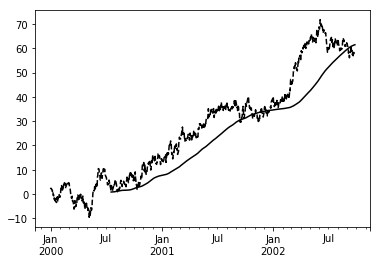

In [26]:
%matplotlib inline
long_s.cumsum().plot(style='k--')
long_s.cumsum().rolling(window=200).mean().plot(style='k')

# 描述性统计

sum(), mean(), quantile(),, cumsum() and cumprod()

|方法|    描述|
|:---:|:---:|
|count	|Number of non-NA observations
|sum	|Sum of values
|mean	|Mean of values
|mad	|Mean absolute deviation
|median	|Arithmetic median of values
|min	|Minimum
|max	|Maximum
|mode	|Mode
|abs	|Absolute Value
|prod	|Product of values
|std	|Bessel-corrected sample standard deviation
|var	|Unbiased variance
|sem	|Standard error of the mean
|skew	|Sample skewness (3rd moment)
|kurt	|Sample kurtosis (4th moment)
|quantile	|Sample quantile (value at %)
|cumsum	|Cumulative sum
|cumprod	|Cumulative product
|cummax	|Cumulative maximum
|cummin	|Cumulative minimum

In [6]:
df = pd.DataFrame(np.random.randn(8, 3), 
                  index=pd.date_range('1/1/2000', periods=8),
                  columns=['A', 'B', 'C'])
df.sum(0, skipna=False)

A    3.963610
B    1.901222
C   -1.626314
dtype: float64

In [8]:
df.describe(percentiles=[.05, .25, .75, .95])

,A,B,C
count,8.000000,8.000000,8.000000
mean,0.495451,0.237653,-0.203289
std,0.777550,0.620215,0.879661
min,-0.793265,-0.765405,-1.550105
5%,-0.612355,-0.616726,-1.335362
25%,0.008873,-0.193686,-0.658487
50%,0.773446,0.317930,-0.191918
75%,0.849285,0.698532,0.164042
95%,1.391554,0.951386,1.001824
max,1.682321,0.955311,1.331309


# pd.Multiindex

In [10]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
              ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])
mi_df = pd.DataFrame({'A': [1, 1, 1, 1, 2, 2, 3, 3],
                   'B': np.arange(8)},
                   index=index)
mi_df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [12]:
index.get_level_values('second')

Index(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'], dtype='object', name='second')

In [11]:
iterables = [['bar', 'baz', 'foo', 'qux'], ['one', 'two']]
pd.MultiIndex.from_product(iterables, names=['first', 'second'])

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

# groupby()